In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignments/loan_dataset.csv')

In [ ]:
#check for duplicates
duplicates = data.duplicated(keep=False)
duplicate_rows = data[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIV

In [ ]:
# Check for null values
null_values = data.isnull().sum()
print(len(null_values[null_values > 0]))

67


In [ ]:
#check for missing values
missing_values = data.isna().sum()
print(missing_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


There are missing values that includes null values. They need to be dealt with for further ease of analysis.

In [ ]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Handle missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [ ]:
# Handle missing values for categorical columns (using mode)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-9-858cb1d7e0f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
display(data)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Here we consider 'TARGET' is the column indicating repayment status
default_percentage = data['TARGET'].value_counts(normalize=True) * 100
print(default_percentage)

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


Visualizing the distribution of defaulters and non defaulters:

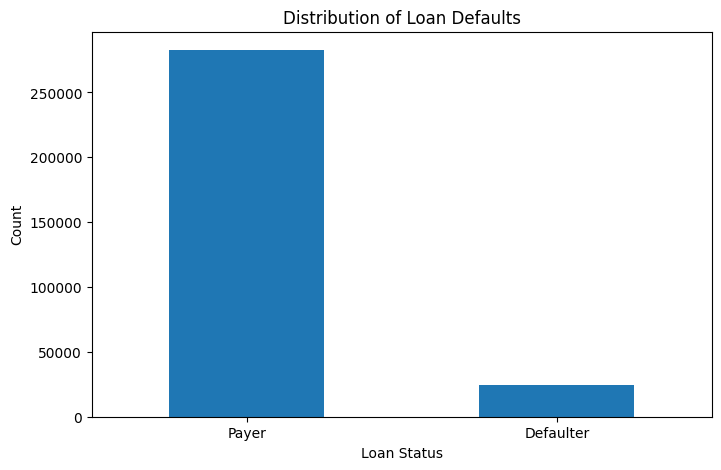

In [ ]:
# Plotting the distribution of TARGET variable
plt.figure(figsize=(8, 5))
data['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Defaults')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Payer', 'Defaulter'], rotation=0)
plt.show()

We can see that the distribution is imbalanced. The defaulters are in the minority. This is a significant problem considering the following factors:

- Training the models on imbalanced datasets can result in faulty predictions about loan defaulting.
- The models will have limited information from the defaulters and cannot accurately their risk.

So now we will use ADASYN to balance the dataset as we have learnt in the machine learning module.

In [ ]:
# Applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Separate features and target variable
X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']

# Check for any remaining NaN values before ADASYN
print("Checking for NaN values in features:")
print(X.isnull().sum()[X.isnull().sum() > 0])

Checking for NaN values in features:
Series([], dtype: int64)


In [ ]:
# Apply ADASYN to generate synthetic samples
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

Original dataset shape: (307511, 229), (307511,)
Resampled dataset shape: (570641, 229), (570641,)


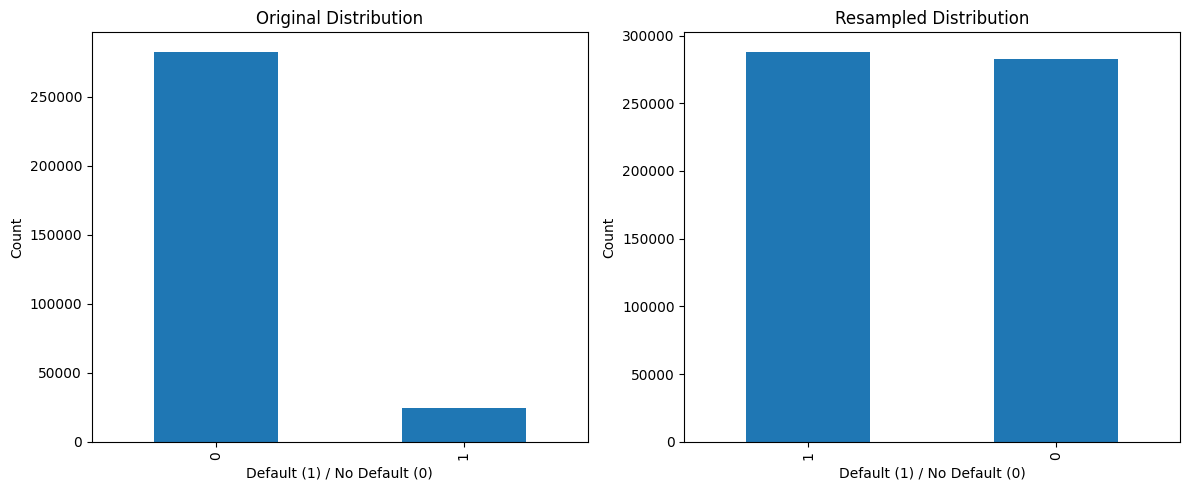

In [ ]:
# Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data_encoded['TARGET'].value_counts().plot(kind='bar')
plt.title('Original Distribution')
plt.xlabel('Default (1) / No Default (0)')
plt.ylabel('Count')

# Plot resampled distribution
plt.subplot(1, 2, 2)
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Resampled Distribution')
plt.xlabel('Default (1) / No Default (0)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Build a deep learning model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Another Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model and save the history for plotting later
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7957 - loss: 0.6877 - val_accuracy: 0.9475 - val_loss: 0.3007
Epoch 2/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9339 - loss: 0.3083 - val_accuracy: 0.9510 - val_loss: 0.2124
Epoch 3/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9443 - loss: 0.2240 - val_accuracy: 0.9524 - val_loss: 0.1780
Epoch 4/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9473 - loss: 0.1934 - val_accuracy: 0.9529 - val_loss: 0.1638
Epoch 5/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9497 - loss: 0.1785 - val_accuracy: 0.9528 - val_loss: 0.1575
Epoch 6/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9507 - loss: 0.1692 - val_accuracy: 0.9532 - val_loss: 0.1547
Epoch 7/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9515 - loss: 0.1651 - val_accuracy: 0.9529 - val_loss: 0.1537
Epoch 8/50
11413/11413 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

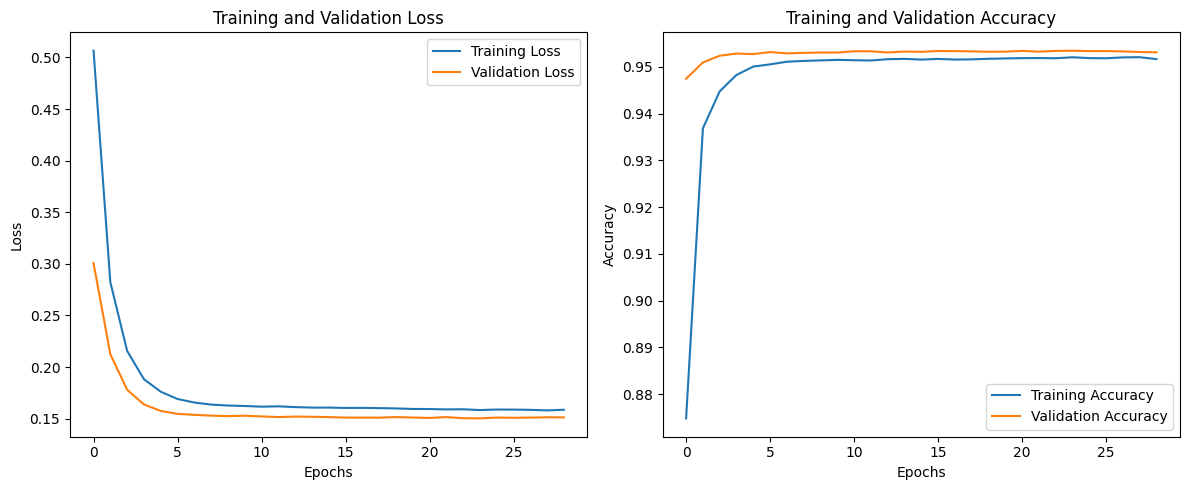

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

Here’s a concise summary of your text in bullet points:

- **Model Performance**: The model is performing well with no significant signs of overfitting or underfitting.
- **Loss Trends**:
  - Training and validation losses decrease significantly in the initial epochs.
  - Both losses plateau after approximately 5-10 epochs.
  - Training loss consistently decreases, indicating effective learning.
  - Validation loss mirrors the training loss without significant increases, suggesting minimal overfitting.
- **Accuracy Trends**:
  - Both training and validation accuracy improve rapidly in the first few epochs.
  - Accuracy stabilizes around 95% for both datasets.
  - Training and validation accuracy are closely aligned, indicating good generalization.
- **Generalization**: The model demonstrates effective generalization to the validation data.

In [ ]:
# Calculate sensitivity as a metric and AUC score
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Sensitivity: {sensitivity}')
print(f'Area Under ROC Curve: {roc_auc}')

3567/3567 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Sensitivity: 0.9084560867148416
Area Under ROC Curve: 0.9766751320871958


## Sensitivity: 0.9085

This means that the model correctly identifies 90.85% of the actual loan defaulters (positive cases). This is a high sensitivity, indicating that the model is good at catching true positives (people who will default on the loan). The model is effective at minimizing false negatives, which is crucial for lenders who want to avoid extending credit to high-risk applicants.

## Area Under ROC Curve (AUC): 0.977

The AUC measures the ability of the model to distinguish between classes (defaults vs. non-defaults). So an AUC value above 0.9 is generally considered excellent, indicating that the model has a strong ability to differentiate between applicants who will default and those who will not.

In [ ]:
# Calculate specificity
specificity = tn / (tn + fp)

# Calculate precision and recall
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

Specificity: 0.9997
F1 Score: 0.9519


## Specificity: 0.9997

A specificity of 99.97% means that the model correctly identifies about 99.77% of applicants who will not default on their loans. So there is only a very tiny probability that model incorrectly classifies the non-defaulters as defaulters. We can say that model is performing very well

## F1 Score: 0.952

An F1 score of 0.952 indicates a strong balance between precision and recall, suggesting that the model performs well in identifying both defaulters and non-defaulters.

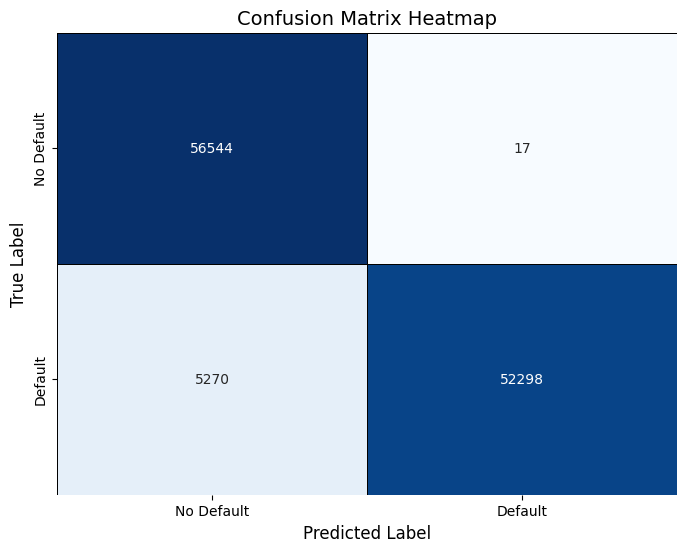

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['No Default', 'Default'],
             yticklabels=['No Default', 'Default'],
             cbar=False, linewidths=0.5, linecolor='black')

plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The model seems to be performing well overall, with a majority of instances being correctly classified.

----------------------------------------------------------------------------------------------------------------------------------------------